<a href="https://colab.research.google.com/github/Jojomaque/Portfolio/blob/main/Edinburgh_Bike_Hire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Load libraries
import time  # timer
import numpy as np  # linear algebra
import pandas as pd  
import seaborn as sns  # plot handling
import matplotlib.pyplot as plt  # plot handling
import folium


Can I show the locations of the bike stations on the SIMD - https://simd.scot/#/simd2020/BTTTFTT/13.666666666666671/-3.1872/55.9374/. to visualise accesibility of bike shares schemes in deprived area?


Is Climate change Inclusive - Poorer families - access to bikes - Fuel Poverty - Cannot afford to upgrade energy system

Hypothesis
Ability to reduce carbon foot print linked to wealth inequality?

- How Accessible are bike hire Schemes? Are they located in more affluent areas/student areas?  (Tourists?)

- Fuel poverty - 
  
  are the visualisations showing that instead of bikes being used to reduce footprint whilst commuting, instead used by tourists/students?

#1 Popular times of travel 
Month
Week
Day/Time of Day
#2 Popular stations and trip
most common start station
most common end station
most common route
#3 Trip duration
total travel time
average travel time
#4 User info
counts of each user type
counts of gender and age?

In [42]:
# Load Data
january = pd.read_csv('https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/2021/01.csv')
february = pd.read_csv('https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/2021/02.csv')
march = pd.read_csv('https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/2021/03.csv')
april = pd.read_csv('https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/2021/04.csv')
may = pd.read_csv('https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/2021/05.csv')

In [43]:
Ed_Bike_2021 = pd.concat([january, february, march, april, may])
Ed_Bike_2021.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-01-01 00:48:42.884000+00:00,2021-01-01 00:52:04.432000+00:00,201,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739
1,2021-01-01 00:52:12.457000+00:00,2021-01-01 01:00:37.449000+00:00,504,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739,1818,Dynamic Earth,"Outside Dynamic Earth, Holyrood Road",55.951089,-3.175725
2,2021-01-01 00:55:14.884000+00:00,2021-01-01 01:12:52.893000+00:00,1058,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,NaN,55.941791,-3.222415
3,2021-01-01 00:55:15.217000+00:00,2021-01-01 01:13:15.643000+00:00,1080,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,NaN,55.941791,-3.222415
4,2021-01-01 00:55:22.724000+00:00,2021-01-01 01:00:20.668000+00:00,297,1096,West Crosscauseway,On island next to Buccleuch Street,55.943836,-3.184951,1727,Causewayside,Outside National Library of Scotland,55.936506,-3.180166


In [44]:
Ed_Bike_2021.tail()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
12601,2021-05-31 23:13:57.978000+00:00,2021-05-31 23:25:46.037000+00:00,708,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765,1745,Scotland Street,Corner with Royal Crescent,55.960380,-3.195470
12602,2021-05-31 23:16:05.243000+00:00,2021-05-31 23:36:46.037000+00:00,1240,1050,EICC,Outside Edinburgh International Conference Centre,55.946071,-3.210396,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395
12603,2021-05-31 23:33:48.579000+00:00,2021-05-31 23:52:51.959000+00:00,1143,1096,West Crosscauseway,On island next to Buccleuch Street,55.943836,-3.184951,1729,McDonald Road,Next to Fire Station,55.964031,-3.185175
12604,2021-05-31 23:35:26.487000+00:00,2021-05-31 23:52:53.068000+00:00,1046,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413
12605,2021-05-31 23:52:27.715000+00:00,2021-06-01 00:01:03.126000+00:00,515,1729,McDonald Road,Next to Fire Station,55.964031,-3.185175,250,Victoria Quay,Entrance to Scottish Government Office,55.977617,-3.174126


DATA DESCRIPTION

In [45]:
Ed_Bike_2021.columns

Index(['started_at', 'ended_at', 'duration', 'start_station_id',
       'start_station_name', 'start_station_description',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_description', 'end_station_latitude',
       'end_station_longitude'],
      dtype='object')

In [46]:
Ed_Bike_2021.describe()

,duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude
count,51856.000000,51856.000000,51856.000000,51856.000000,51856.000000,51856.000000,51856.000000
mean,2103.003953,1141.948569,55.949682,-3.194467,1213.638383,55.951868,-3.191987
std,2149.692109,681.672390,0.013666,0.042966,676.440361,0.014454,0.047250
min,61.000000,171.000000,55.908413,-3.407156,171.000000,55.908413,-3.407156
25%,710.000000,265.000000,55.940081,-3.207101,265.000000,55.940238,-3.208070
50%,1429.000000,1093.000000,55.947097,-3.191890,1721.000000,55.951501,-3.188311
75%,2871.000000,1754.000000,55.957915,-3.176180,1757.000000,55.960380,-3.174126
max,27006.000000,2268.000000,55.992957,-3.058307,2268.000000,55.992957,-3.058307


In [47]:
Ed_Bike_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51856 entries, 0 to 12605
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   started_at                 51856 non-null  object 
 1   ended_at                   51856 non-null  object 
 2   duration                   51856 non-null  int64  
 3   start_station_id           51856 non-null  int64  
 4   start_station_name         51856 non-null  object 
 5   start_station_description  51102 non-null  object 
 6   start_station_latitude     51856 non-null  float64
 7   start_station_longitude    51856 non-null  float64
 8   end_station_id             51856 non-null  int64  
 9   end_station_name           51856 non-null  object 
 10  end_station_description    50933 non-null  object 
 11  end_station_latitude       51856 non-null  float64
 12  end_station_longitude      51856 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usag

In [48]:
# check missing value
Ed_Bike_2021.isnull().sum()

started_at                     0
ended_at                       0
duration                       0
start_station_id               0
start_station_name             0
start_station_description    754
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_description      923
end_station_latitude           0
end_station_longitude          0
dtype: int64

DATA PREPARATION

In [49]:
# change some format
Ed_Bike_2021['started_at'] = pd.to_datetime(Ed_Bike_2021['started_at'])
Ed_Bike_2021['ended_at'] = pd.to_datetime(Ed_Bike_2021['ended_at'])
Ed_Bike_2021.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51856 entries, 0 to 12605
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   started_at                 51856 non-null  datetime64[ns, UTC]
 1   ended_at                   51856 non-null  datetime64[ns, UTC]
 2   duration                   51856 non-null  int64              
 3   start_station_id           51856 non-null  int64              
 4   start_station_name         51856 non-null  object             
 5   start_station_description  51102 non-null  object             
 6   start_station_latitude     51856 non-null  float64            
 7   start_station_longitude    51856 non-null  float64            
 8   end_station_id             51856 non-null  int64              
 9   end_station_name           51856 non-null  object             
 10  end_station_description    50933 non-null  object             
 11  en

In [50]:
Ed_Bike_2021['month'] = Ed_Bike_2021['started_at'].dt.month_name()
Ed_Bike_2021

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,month
0,2021-01-01 00:48:42.884000+00:00,2021-01-01 00:52:04.432000+00:00,201,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739,January
1,2021-01-01 00:52:12.457000+00:00,2021-01-01 01:00:37.449000+00:00,504,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739,1818,Dynamic Earth,"Outside Dynamic Earth, Holyrood Road",55.951089,-3.175725,January
2,2021-01-01 00:55:14.884000+00:00,2021-01-01 01:12:52.893000+00:00,1058,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,NaN,55.941791,-3.222415,January
3,2021-01-01 00:55:15.217000+00:00,2021-01-01 01:13:15.643000+00:00,1080,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,NaN,55.941791,-3.222415,January
4,2021-01-01 00:55:22.724000+00:00,2021-01-01 01:00:20.668000+00:00,297,1096,West Crosscauseway,On island next to Buccleuch Street,55.943836,-3.184951,1727,Causewayside,Outside National Library of Scotland,55.936506,-3.180166,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,2021-05-31 23:13:57.978000+00:00,2021-05-31 23:25:46.037000+00:00,708,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765,1745,Scotland Street,Corner with Royal Crescent,55.960380,-3.195470,May
12602,2021-05-31 23:16:05.243000+00:00,2021-05-31 23:36:46.037000+00:00,1240,1050,EICC,Outside Edinburgh International Conference Centre,55.946071,-3.210396,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395,May
12603,2021-05-31 23:33:48.579000+00:00,2021-05-31 23:52:51.959000+00:00,1143,1096,West Crosscauseway,On island next to Buccleuch Street,55.943836,-3.184951,1729,McDonald Road,Next to Fire Station,55.964031,-3.185175,May
12604,2021-05-31 23:35:26.487000+00:00,2021-05-31 23:52:53.068000+00:00,1046,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413,May


In [51]:
Ed_Bike_2021['month'].value_counts()
month = Ed_Bike_2021.month.value_counts().to_frame().reset_index()
month.rename(columns={'index':'month','month':'journeys'}, inplace=True)
month

,month,journeys
0,April,14785
1,March,13279
2,May,12606
3,February,6559
4,January,4627


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

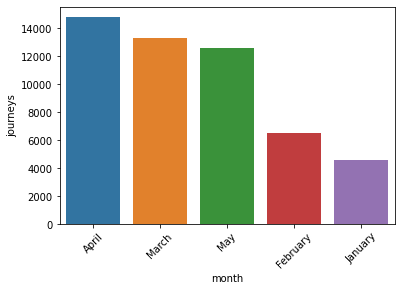

In [52]:
sns.barplot(data = month
            ,x = 'month'
            ,y = 'journeys'
            )
plt.xticks(rotation = 45
           )
 


April had the highes number of journeys.in 

In [53]:
Week_day = Ed_Bike_2021['week_day'] = Ed_Bike_2021['started_at'].dt.day_name()
Ed_Bike_2021

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,month,week_day
0,2021-01-01 00:48:42.884000+00:00,2021-01-01 00:52:04.432000+00:00,201,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739,January,Friday
1,2021-01-01 00:52:12.457000+00:00,2021-01-01 01:00:37.449000+00:00,504,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739,1818,Dynamic Earth,"Outside Dynamic Earth, Holyrood Road",55.951089,-3.175725,January,Friday
2,2021-01-01 00:55:14.884000+00:00,2021-01-01 01:12:52.893000+00:00,1058,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,NaN,55.941791,-3.222415,January,Friday
3,2021-01-01 00:55:15.217000+00:00,2021-01-01 01:13:15.643000+00:00,1080,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,NaN,55.941791,-3.222415,January,Friday
4,2021-01-01 00:55:22.724000+00:00,2021-01-01 01:00:20.668000+00:00,297,1096,West Crosscauseway,On island next to Buccleuch Street,55.943836,-3.184951,1727,Causewayside,Outside National Library of Scotland,55.936506,-3.180166,January,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,2021-05-31 23:13:57.978000+00:00,2021-05-31 23:25:46.037000+00:00,708,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765,1745,Scotland Street,Corner with Royal Crescent,55.960380,-3.195470,May,Monday
12602,2021-05-31 23:16:05.243000+00:00,2021-05-31 23:36:46.037000+00:00,1240,1050,EICC,Outside Edinburgh International Conference Centre,55.946071,-3.210396,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395,May,Monday
12603,2021-05-31 23:33:48.579000+00:00,2021-05-31 23:52:51.959000+00:00,1143,1096,West Crosscauseway,On island next to Buccleuch Street,55.943836,-3.184951,1729,McDonald Road,Next to Fire Station,55.964031,-3.185175,May,Monday
12604,2021-05-31 23:35:26.487000+00:00,2021-05-31 23:52:53.068000+00:00,1046,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413,May,Monday


In [54]:
Ed_Bike_2021['week_day'].value_counts()
week_day = Ed_Bike_2021.week_day.value_counts().to_frame().reset_index()
week_day.rename(columns={'index':'day','week_day':'journeys'}, inplace=True)
week_day

,day,journeys
0,Saturday,9892
1,Sunday,8711
2,Friday,7751
3,Monday,6897
4,Wednesday,6274
5,Tuesday,6175
6,Thursday,6156


1 Most popular day to hire bike


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

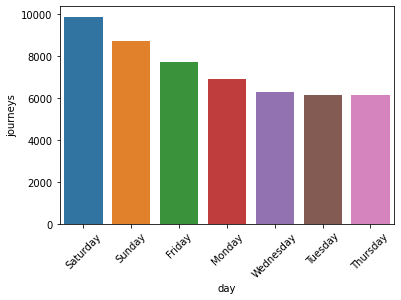

In [55]:

sns.barplot(data = week_day
            ,x = 'day'
            ,y = 'journeys'
            )
plt.xticks(rotation = 45
           )

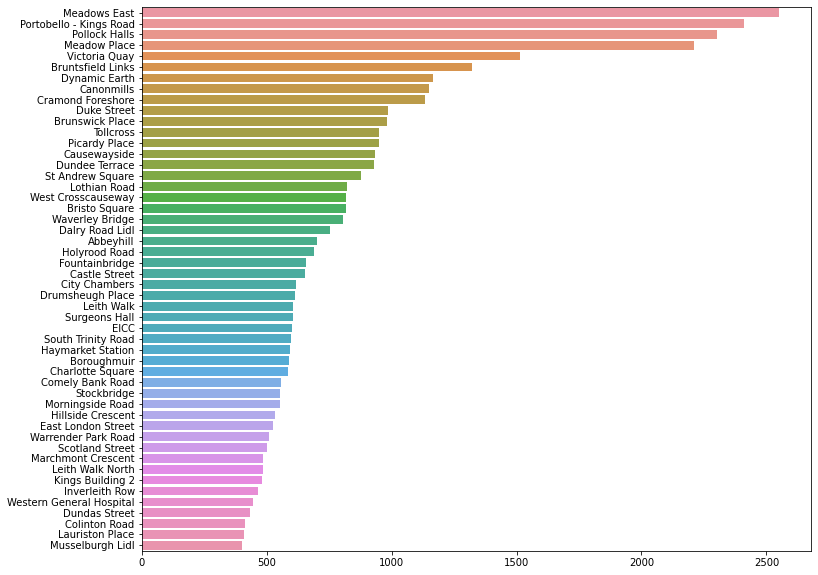

In [56]:
startstation = Ed_Bike_2021['start_station_name'].value_counts()[:50
                                                                ]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  ) ;

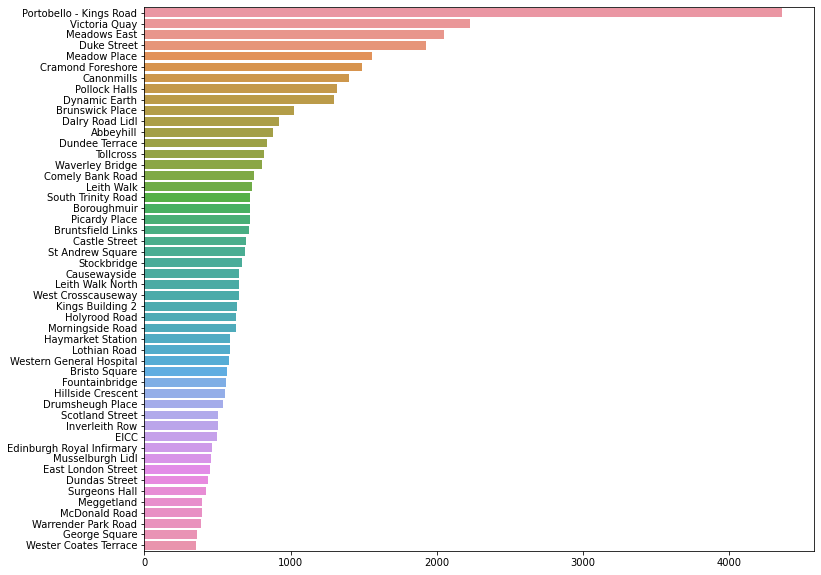

In [57]:
endstation = Ed_Bike_2021['end_station_name'].value_counts()[:50
                                                                ]
plt.figure(figsize=(12,10))
sns.barplot( x=endstation.values , y=list(endstation.index), 
 orient="h"  ) ;

In [73]:
coord = Ed_Bike_2021[['start_station_latitude','start_station_longitude']].drop_duplicates() 
coord

,start_station_latitude,start_station_longitude
0,55.940238,-3.194640
1,55.939809,-3.182739
2,55.951981,-3.191890
4,55.943836,-3.184951
6,55.953164,-3.181682
...,...,...
1648,55.981107,-3.394211
2209,55.992957,-3.407156
2323,55.926684,-3.289481
33,55.965176,-3.176180


In [74]:
Ed_map = folium.Map(location=[ 55.940238	,  -3.194640], zoom_start=12) # Determining the Edinburgh map using latitude and longitude data
lat = coord['start_station_latitude'].values # taking the latitude values from the stations of the dataset Ed_Bike_2021
long = coord['start_station_longitude'].values # taking the values of longitude of the stations of the dataset Ed_Bike_2021

for la, lo in zip(lat, long): # for each value in lat and long...
    folium.Marker([la, lo]).add_to(Ed_map) # create a marker and place in the map variable (
Ed_map # Show the Map